In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from copy import deepcopy
from collections import Counter
import json
from tqdm import tqdm
import glob

In [3]:
path_dr = glob.glob('/media3/CRP8/TDE/data/DR_photometry_full/galactic/*.csv')
len(path_dr)

40886

In [5]:
data_galatic = pd.read_csv('/media3/darc/crp8_variability/notebooks/data_preparation/Data_CSV/DR_galactic_incomplete_final.csv')

# [Calculating Statistics for the paper]

In [6]:
len(data_galatic)

40854

In [9]:
data_final = pd.read_csv('/media3/darc/crp8_variability/notebooks/FINAL_DR_gaia_crossmatch_final_final.csv')

In [11]:
data_alert = pd.read_parquet('/media3/CRP8/TDE/data/xmatch/galactic/')
data_alert = data_alert.groupby('objectId', sort=False, as_index=False).agg(list)
data_alert['top_class'] = [np.unique(data_alert['finkclass'].values[i]) for i in range(data_alert.shape[0])]
data_alert['ztf_id']= data_alert['objectId']

# [EXTRA]

In [18]:
data_final.columns

Index(['ztf_id', 'ra_mean_dr', 'dec_mean_dr', 'mjd', 'mag', 'magerr', 'band',
       'catflags', 'source', 'ID_gaia', 'classifier_gaia', 'class_gaia',
       'classSc_gaia', 'ra_gaia', 'dec_gaia', 'GroupID', 'GroupSize',
       'Separation'],
      dtype='object')

In [17]:
data_alert.columns

Index(['objectId', 'finkclass', 'candid', 'dec', 'fid', 'jd', 'ra', 'sigmapsf',
       'magpsf', 'cat_id', 'top_class', 'ztf_id'],
      dtype='object')

In [19]:
data_all = pd.merge(data_final, data_alert[['ztf_id','top_class','cat_id','finkclass']], on="ztf_id", how="inner")

In [21]:
data_all.to_csv('/media3/darc/crp8_variability/notebooks/FINAL_Galactic_all.csv',index=False)

In [3]:
# path_test = ('/media3/CRP8/TDE/data/DR_photometry_full/galactic/ZTF24aaavbup.csv')
# pd.read_csv(path_test)

In [4]:
# all_lcs = []
# count = 0
# # Filter mapping
# filter_map = {"zg": ("g", 1), "zr": ("r", 2), "zi": ("i", 3)}

# for i in tqdm(range(len(path_dr))):
#     data = pd.read_csv(path_dr[i])

#     ztf_id = path_dr[i].split('/')[-1].split('.')[0]

#     ra = data['ra'].values
#     dec = data['dec'].values
#     mag = data['mag'].values
#     mag_err = data['magerr'].values
#     mjd = data['mjd'].values
#     filters = data['filtercode'].values
#     catflags = data['catflags'].values
#     obj_id = data['oid'].values

    
#     # Check for empty arrays
#     if len(ra) == 0 or len(mag) == 0:
#         count = count+1
#         print(f"⚠️ Empty array found for ztf_id {ztf_id} (ra: {len(ra)}, mag: {len(mag)})")
#         continue

    



#     # Convert filtercodes to g/r/i
#     bands = np.array([filter_map[f][0] for f in filters])
    


#     ra_mean = np.median(ra)
#     dec_mean = np.median(dec)

#     # Append as dictionary (arrays stored as lists for DataFrame)
#     all_lcs.append({
#         "ztf_id": ztf_id,
#         "ra_mean_dr": ra_mean,
#         "dec_mean_dr": dec_mean,
#         "mjd": mjd.tolist(),
#         "mag": mag.tolist(),
#         "magerr": mag_err.tolist(),
#         "band": bands.tolist(),
#         "catflags": catflags.tolist()
#     })

# # # # Build dataframe
# df_all = pd.DataFrame(all_lcs)


In [5]:
#PLEASE THIS IS THE FINAL FILE, YES ITS MISSING 32 but the total is around 40,000
#df_all.to_csv('/media3/darc/crp8_variability/notebooks/data_preparation/Data_CSV/DR_galactic_incomplete_final.csv')

# Gaia Catalog Crossmatch:

In [2]:
gaia_df = pd.read_csv('Data_CSV/DR_galactic_incomplete_gaia_matched.csv')
gaia_df.head()

,col1,ztf_id,ra_mean_dr,dec_mean_dr,mjd,mag,magerr,band,catflags,Source,...,VPN,VST,VLPV,VEB,VRM,VMSO,VAGN,Vmicro,VCC,angDist
0,1,ZTF19aadosog,264.425380,-3.260064,"[58204.5047222, 58204.5313542, 58207.4700579, ...","[15.3615971, 15.3990307, 15.397109, 15.390646,...","[0.0269933715, 0.0268484559, 0.0268558413, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 0, 0, 0, 32768, 0, 0, 0, 0, 0, 0, 0,...",4368928660066700416,...,0,0,1,0,0,0,0,0,0,0.093589
1,4,ZTF22aapkjuq,48.384165,61.270517,"[58206.1445718, 58298.468125, 58303.4488426, 5...","[17.2257824, 17.1839542, 17.2256432, 17.185871...","[0.0266686473, 0.0263112336, 0.0266674254, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[32768, 0, 32768, 32768, 32768, 32768, 0, 0, 0...",463590493535359104,...,0,0,0,0,0,0,0,0,0,0.048173
2,5,ZTF20achepck,108.812986,-11.083119,"[58204.1840625, 58204.2027083, 58205.1328935, ...","[17.6450787, 17.6697826, 17.687809, 17.6270638...","[0.0313893594, 0.0317580402, 0.032031931, 0.03...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 32768, 0, 0, 0, 0, 32768, 0, 32768, 0, ...",3046990919530600704,...,0,0,0,0,0,0,0,0,0,0.019057
3,6,ZTF18aazelli,311.908466,43.824497,"[58206.4825463, 58206.5241319, 58230.4926042, ...","[19.7525101, 19.87286, 19.8371677, 19.5197411,...","[0.0815624893, 0.0883840397, 0.0863023996, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2067032764453394816,...,0,0,0,0,0,0,0,0,0,0.048338
4,7,ZTF18abchtpe,329.248995,51.551339,"[58208.4737963, 58209.5032755, 58210.5151157, ...","[16.4396381, 16.4618874, 16.5001736, 16.523174...","[0.0153009808, 0.0153838331, 0.0155301727, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[32768, 0, 0, 0, 0, 32768, 0, 0, 32768, 0, 0, ...",1981030476770622080,...,0,0,0,0,0,0,0,0,0,0.054581


In [3]:
len(gaia_df),gaia_df.columns

(18954,
 Index(['col1', 'ztf_id', 'ra_mean_dr', 'dec_mean_dr', 'mjd', 'mag', 'magerr',
        'band', 'catflags', 'Source', 'RAdeg', 'DEdeg', 'NG', 'TimeG', 'DurG',
        'Gmagmin', 'Gmagmax', 'Gmagmean', 'Gmagmed', 'dGmag', 'tdGmag',
        's_Gmagmean', 'GmagSkew', 'GmagKur', 'GmagMAD', 'GmagAbbe', 'iqrGmag',
        'GmagStet', 'GmagS/N', 'RGmag', 'NBP', 'TimeBP', 'DurBP', 'BPmagmin',
        'BPmagmax', 'BPmagmean', 'BPmagmed', 'dBPmag', 'tdBPmag', 's_BPmag',
        'BPmagSkew', 'BPmagKur', 'BPmagMAD', 'BPmagAbbe', 'iqrBPmag',
        'BPmagStet', 'BPmagS/N', 'RBPmag', 'NRP', 'TimeRP', 'DurRP', 'RPmagmin',
        'RPmagmax', 'RPmagmean', 'RPmagmed', 'dRPmag', 'tdRPmag', 's_RPmag',
        'RPmagSkew', 'RPmagKur', 'RPmagMAD', 'RPmagAbbe', 'iqrRPmag',
        'RPmagStet', 'RPmagS/N', 'RRPmag', 'VCR', 'VRRLyr', 'VCep', 'VPN',
        'VST', 'VLPV', 'VEB', 'VRM', 'VMSO', 'VAGN', 'Vmicro', 'VCC',
        'angDist'],
       dtype='object'))

In [19]:
gaia_df = gaia_df[['ztf_id','ra_mean_dr', 'dec_mean_dr', 'mjd', 'mag', 'magerr',
         'band', 'catflags', 'Source','BPmagmean','RPmagmean','VCR', 
         'VRRLyr', 'VCep', 'VPN','VST','VLPV', 'VEB', 'VRM', 'VMSO', 
         'VAGN', 'Vmicro', 'VCC']]

flag_cols = ['VCR','VRRLyr','VCep','VPN','VST','VLPV','VEB',
             'VRM','VMSO','VAGN','Vmicro','VCC']

def assign_class(row):
    for col in flag_cols:
        if row[col] == 1:
            return col  # return the first matching flag
    return "Unknown"  # if no flag is set

gaia_df['Class'] = gaia_df.apply(assign_class, axis=1)

In [7]:
data_DR = pd.read_csv('Data_CSV/DR_galactic_incomplete_final.csv')

In [8]:
data_DR = data_DR[['ztf_id', 'ra_mean_dr', 'dec_mean_dr', 'mjd', 'mag',
       'magerr', 'band', 'catflags']]

In [9]:
data_DR.columns

Index(['ztf_id', 'ra_mean_dr', 'dec_mean_dr', 'mjd', 'mag', 'magerr', 'band',
       'catflags'],
      dtype='object')

In [22]:
data_DR_merged = data_DR.merge(
    gaia_df, 
    on=['ztf_id', 'ra_mean_dr', 'dec_mean_dr', 'mjd', 'mag',
       'magerr', 'band', 'catflags'],  # join keys
    how='left'  # preserve all rows from data_DR
)
data_DR_merged['Class'] = data_DR_merged['Class'].fillna("Unknown")



In [23]:
data_DR_merged.columns

Index(['ztf_id', 'ra_mean_dr', 'dec_mean_dr', 'mjd', 'mag', 'magerr', 'band',
       'catflags', 'Source', 'BPmagmean', 'RPmagmean', 'VCR', 'VRRLyr', 'VCep',
       'VPN', 'VST', 'VLPV', 'VEB', 'VRM', 'VMSO', 'VAGN', 'Vmicro', 'VCC',
       'Class'],
      dtype='object')

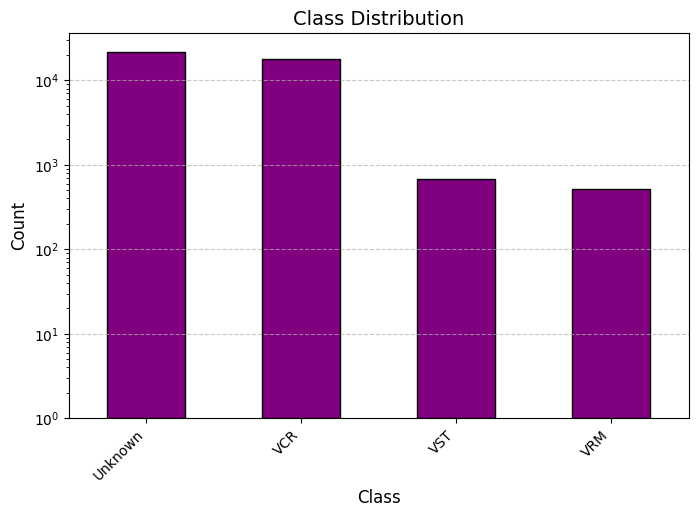

In [24]:
counts = data_DR_merged['Class'].value_counts()
counts
# Plot
plt.figure(figsize=(8,5))
counts.plot(kind="bar", color="purple", edgecolor="black", log=True)

plt.title("Class Distribution", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [33]:
#data_DR_merged.to_csv('/media3/darc/crp8_variability/notebooks/data_preparation/Data_CSV/final_DR_galactic_incomplete_gaia_matched.csv', index=False)

## Unknown Objects:

In [34]:
#data_all_incomplete[data_all_incomplete['Class']=='Unknown']

In [31]:
import ast

def peak_cut_band(row, sigma_cut=1):
    
    mask_quality = np.array(ast.literal_eval(row["catflags"]))==0
    
    bands = np.array(ast.literal_eval(row["band"]))[mask_quality]  
    mags = np.array(ast.literal_eval(row["mag"]))[mask_quality]


    if len(mags) == 0:
        return False  

    median = np.mean(mags)
    sigma = np.std(mags)

    peaks = {}
    for band in ['g', 'r']:
        mask = bands == band
        if mask.sum() > 0:
            peaks[band] = mags[mask].min()
        else:
            peaks[band] = np.nan

    keep = (
        (not np.isnan(peaks['g'])) and 
        (not np.isnan(peaks['r'])) and 
        (peaks['g'] + sigma_cut * sigma < median) and 
        (peaks['r'] < median - sigma_cut * sigma)
    )

    return keep

# Only Unknown objects
unknown_data = data_DR_merged[data_DR_merged["Class"] == "Unknown"]

for sigma_cut in tqdm([1, 2, 3]):
    df_selected = unknown_data[unknown_data.apply(peak_cut_band, axis=1, sigma_cut=sigma_cut)]
    print(f"Sigma {sigma_cut}: Selected {len(df_selected)} / {len(unknown_data)} objects")


 33%|████████████████████████▋                                                 | 1/3 [03:48<07:37, 228.91s/it]

Sigma 1: Selected 473 / 21905 objects


 67%|█████████████████████████████████████████████████▎                        | 2/3 [07:37<03:48, 228.89s/it]

Sigma 2: Selected 109 / 21905 objects


100%|██████████████████████████████████████████████████████████████████████████| 3/3 [11:25<00:00, 228.41s/it]

Sigma 3: Selected 29 / 21905 objects


In [32]:
df_selected

,ztf_id,ra_mean_dr,dec_mean_dr,mjd,mag,magerr,band,catflags,Source,BPmagmean,...,VPN,VST,VLPV,VEB,VRM,VMSO,VAGN,Vmicro,VCC,Class
4369,ZTF19abdoqzc,278.615860,-12.939708,"[58206.488125, 58208.4865972, 58209.5111458, 5...","[12.8723946, 12.7119551, 12.8456936, 12.87111,...","[0.0220597684, 0.0220720246, 0.0220615566, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 32768, 0, 0, 0, 32768, 0, 0, 0, 0, 32768, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
4551,ZTF19aaeqbve,81.892116,-6.885536,"[58204.1532986, 58360.4778588, 58363.5030787, ...","[15.9803905, 15.9652882, 15.9747849, 16.012702...","[0.0130861718, 0.013046206, 0.0130712688, 0.01...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 0, 0, 0, 0, 32768, 0, 32768, 0, 0, 0...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
9806,ZTF18acgoczu,100.536405,7.711920,"[58204.151875, 58204.2036343, 58205.1319792, 5...","[12.6650677, 12.6004591, 12.6102324, 12.586064...","[0.0113254599, 0.0112859234, 0.0112918746, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 0, 0, 0, 0, 32768, 32768, 32768, 327...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
10422,ZTF18acdotum,33.115500,57.526564,"[58269.4823264, 58275.4727083, 58277.4647685, ...","[12.6018448, 12.6210365, 12.6136179, 12.615943...","[0.0188178718, 0.0187861174, 0.0187983885, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 32768, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
10796,ZTF18abckaix,336.922276,52.362596,"[58228.4895255, 58232.5021296, 58234.4227894, ...","[12.8489027, 12.8570709, 12.886939, 12.8872395...","[0.0118562346, 0.0118560744, 0.0118555436, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 0, 0, 0, 32768, 0, 0, 0, 0, 0, 32768...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
12369,ZTF18abjxwjj,229.646302,2.047749,"[58202.3754282, 58205.3908218, 58205.4015741, ...","[15.1621914, 15.1668024, 15.1719332, 15.145721...","[0.0232717786, 0.0232849643, 0.0232996643, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 0, 32768, 0, 0, 0, 0, 0, 0, 32768, 3...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
13880,ZTF18aampkoq,259.339435,43.120521,"[58203.4984491, 58203.4993981, 58204.4081829, ...","[15.2001934, 15.1972771, 15.1845093, 15.185541...","[0.0193374194, 0.0193340443, 0.0193193946, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 0, 0, 0, 0, 0, 32768, 0, 0, 0, 0, 0,...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
14097,ZTF18aaklnzi,205.294583,28.880630,"[58202.3734838, 58205.3041435, 58205.3461343, ...","[17.8123016, 17.8230114, 17.8032303, 17.888031...","[0.0368595794, 0.0370497443, 0.036700014, 0.03...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[0, 0, 0, 0, 0, 32768, 0, 0, 0, 0, 0, 0, 0, 0,...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
14421,ZTF19aaaofur,116.122480,-23.831408,"[58204.1863657, 58204.2008796, 58206.1343403, ...","[13.1165934, 13.1472435, 13.1948061, 13.180885...","[0.011540072, 0.0115676317, 0.0116108675, 0.01...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[32768, 32768, 0, 0, 32768, 32768, 0, 0, 0, 0,...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
17368,ZTF18acweazg,111.943725,-9.714916,"[58204.1840625, 58204.2027083, 58205.1328935, ...","[13.5777493, 13.592659, 13.5957031, 13.6031504...","[0.0115902629, 0.0115907015, 0.0115907993, 0.0...","['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', ...","[32768, 32768, 32768, 32768, 0, 0, 0, 0, 32768...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown


In [29]:
#gaia_df[['ztf_id', 'ra_mean_dr', 'dec_mean_dr', 'mjd', 'mag', 'magerr','band', 'catflags', 'Source','BPmagmean,'RPmagmean','VCR', 'VRRLyr', 'VCep', 'VPN','VST','VLPV', 'VEB', 'VRM', 'VMSO', 'VAGN', 'Vmicro', 'VCC']]

# gaia_df[[ 'ztf_id','Source', 'NBP', 'TimeBP', 'DurBP', 'BPmagmin',
#         'BPmagmax', 'BPmagmean', 'BPmagmed', 'dBPmag', 'tdBPmag', 's_BPmag',
#         'BPmagSkew', 'BPmagKur', 'BPmagMAD', 'BPmagAbbe', 'iqrBPmag',
#         'BPmagStet', 'BPmagS/N', 'RBPmag', 'NRP', 'TimeRP', 'DurRP', 'RPmagmin',
#         'RPmagmax', 'RPmagmean', 'RPmagmed', 'dRPmag', 'tdRPmag', 's_RPmag',
#         'RPmagSkew', 'RPmagKur', 'RPmagMAD', 'RPmagAbbe', 'iqrRPmag',
#         'RPmagStet', 'RPmagS/N', 'RRPmag']]